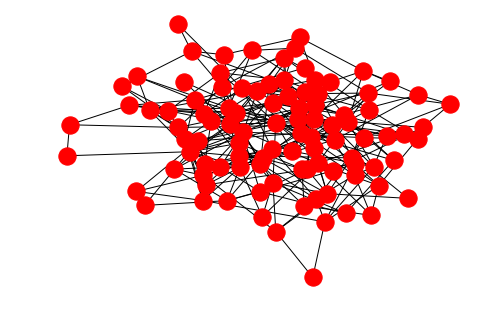

In [86]:
####### define a function for constructing an Erdos_Renyi graph with N node and conection probabilty p 
import networkx as nx
import numpy as np
def Graph(M,prob):
    #return nx.barabasi_albert_graph(N, m, seed=None)
    #return nx.newman_watts_strogatz_graph(N, k, p, seed=None)
    return nx.erdos_renyi_graph(M,prob, seed=None)

#pos=nx.circular_layout(Graph(20,.5))
nx.draw(Graph(100,.06))    ####just example

In [87]:
######function for constructing Adjacancy matrix(0,1) from an Erdos Renyi graph which is produced before
import scipy as sp
import networkx as nx
import random

def Adj(G):
    A=nx.to_numpy_matrix(G)
    A=np.array(A) 
    return A

print(Adj(Graph(5,.5)))   ###just example

[[0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [88]:
####a function to create the Adjacancy matrix for friendship and hostility(1,-1) relation between nodes####
def link(C):
    for i in range(len(C)):
        for j in range(i):
            if C[i][j]==1:
                x=random.uniform(0.0 , 1.0)
                if x<=.5:
                    C[i][j]=C[j][i]=1
                else:
                    C[i][j]=C[j][i]=-1
            else:
                pass
    return C


#print(Adj(Graph(5,.5)))
print(link(Adj(Graph(5,.5))))   #####example######

[[ 0.  0.  1.  1.  1.]
 [ 0.  0.  1.  0.  0.]
 [-1.  1.  0.  1.  1.]
 [-1.  0. -1.  0.  1.]
 [ 1.  0. -1.  1.  0.]]


In [92]:
#########################defining the different type of pairs densities######################
#####################Node[i] is amount of node i in the network which is 1(blue) or 0(white) 

def density_a(a,Node):  ###### density of a type#############
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==-1 and Node[i]==0 and Node[j]==0:
                Sum+=1
                
    return Sum
#########################################################
    
def density_e(a, Node):   #######density of e type
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if (a[i][j]==1 and  Node[i]==1 and Node[j]==0) or (a[i][j]==1 and  Node[i]==0 and Node[j]==1):
                Sum+=1
    return Sum
##########################################################

def density_c(a, Node):   ##### c typpe############
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==-1 and Node[i]==1 and Node[j]==1:
                Sum+=1
    return Sum
##############################################################
def density_b(a, Node):   ####### b type################
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==1 and Node[i]==0 and Node[j]==0:
                Sum+=1
                
    return Sum
##############################################################  
def density_f(a, Node):    ####### f type
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if (a[i][j]==-1 and  Node[i]==1 and Node[j]==0) or (a[i][j]==-1 and  Node[i]==0 and Node[j]==1):
                Sum+=1

    return Sum
    
#######################################################################
def density_d(a, Node):     ######## d type
    Sum=0.0
    for i in range(len(a)):
        for j in range(i):
            if a[i][j]==1 and Node[i]==1 and Node[j]==1:
                Sum+=1
                
    return Sum


In [93]:
###################an example to see that our pairs densities work properly or not??
import random
import numpy as np
Node=np.zeros((5),dtype=int)
for i in range(5):
    x=random.uniform(0,1)
    if x<.5:
        Node[i]=1
    else:
        Node[i]=0
print(Node)      
c=link(Adj(Graph(5,.6)))
print(c)
print("D_a", density_a(c, Node))
print("D_e", density_e(c, Node))
print("D_c", density_c(c, Node))

print("D_b", density_b(c, Node))
print("D_f", density_f(c, Node))
print("D_d", density_d(c, Node))


[1 1 0 1 1]
[[ 0.  1.  1.  0.  1.]
 [-1.  0.  1.  1.  0.]
 [ 1. -1.  0.  0.  1.]
 [ 0. -1.  0.  0.  1.]
 [-1.  0. -1. -1.  0.]]
D_a 0.0
D_e 1.0
D_c 4.0
D_b 0.0
D_f 2.0
D_d 0.0


In [79]:
#################constants problem

N=100
probability=.08    ### edge probabilty connection 
#p=.8    ##### the probabilty which we update nodes and links with it

mu=probability*N  ####### the mean-degree of network
L=(mu*N)/2.0   ##### NUMBER OF LINKS
print(L)
iteration=int(6000*L)  ##############60 step monte carlo
ensemble=2
############## mean_degree=N*p#################

400.0


In [80]:
def mean_link(B,N):
    Sum=0.0
    for i in range(len(B)):
        for j in range(i):
            if B[i][j]==1 or B[i][j]==-1:
                Sum+=1
    return Sum

0
1


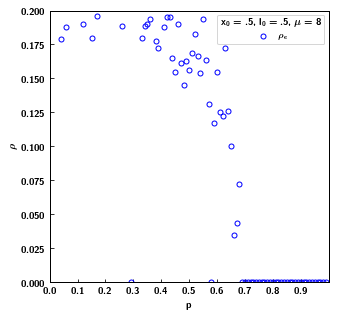

In [81]:
import numpy as np 
import math
import string
import random
import matplotlib.pyplot as plt
import networkx as nx

Adjacancy=np.zeros((N,N),dtype=int)

D_a=np.zeros((ensemble,100),dtype=float)
D_e=np.zeros((ensemble,100), dtype=float)
D_c=np.zeros((ensemble,100),dtype=float)

D_b=np.zeros((ensemble,100),dtype=float)
D_f=np.zeros((ensemble,100),dtype=float)
D_d=np.zeros((ensemble,100),dtype=float)

Node =np.zeros((N),dtype=int)

for ens in range(ensemble):
    print(ens)
    for p in np.arange(0., 1 , .01):
   
    
        Adjacancy=link(Adj(Graph(N,probability)))   ##### matrix of friendship and hostility (1,-1)
        #print(mean_link(Adjacancy,N))
        for i in range(N):
            Node[i]=random.choice([0,1]) ######### amount of each node

        for it in range(iteration):   ########step monte carlo loop
            ###############first we choose an edge randomly
            K=0
            I=random.randint(1,N-1)
            K=I
            J=random.randint(0,K-1)

            ###############update rules###################
            if Adjacancy[I][J]==-1 and Node[I]==0 and Node[J]==0:  ###type a

                r1=random.uniform(0,1)
                if r1<p:
                    Adjacancy[I][J]=1
                   

                else:
                    x=random.uniform(0,1)
                    if x<.5:
                        Node[I]=1
                    else:
                        Node[J]=1

            elif Adjacancy[I][J]==1 and Node[I]==1 and Node[J]==0:  #####type e
                r1=random.uniform(0,1)
                if r1<p:
                    Adjacancy[I][J]=-1
                   

                elif r1>= p and r1< p+(1-p)/2.0:
                    Node[I]=0

                else:
                    Node[J]=1


            elif Adjacancy[I][J]==1 and Node[I]==0 and Node[J]==1:   ######type e
                r1=random.uniform(0,1)
                if r1<p:
                    Adjacancy[I][J]=-1
                   

                elif r1>= p and r1< p+(1-p)/2.0:
                    Node[I]=1

                else:
                    Node[J]=0


            elif  Adjacancy[I][J]==-1 and Node[I]==1 and Node[J]==1:   ##### type c

                r1=random.uniform(0,1)
                if r1<p:
                    Adjacancy[I][J]=1
                    

                else:
                    x=random.uniform(0,1)
                    if x<.5:
                        Node[I]=0
                    else:
                        Node[J]=0


            else:
                pass

                
        D_a[ens][int(p*100)]=density_a(Adjacancy, Node)
        D_e[ens][int(p*100)]=density_e(Adjacancy, Node)
        D_c[ens][int(p*100)]=density_c(Adjacancy, Node)
    
        D_b[ens][int(p*100)]=density_b(Adjacancy, Node)
        D_f[ens][int(p*100)]=density_f(Adjacancy, Node)
        D_d[ens][int(p*100)]=density_d(Adjacancy, Node)
        
        
dens_a=np.zeros((100),dtype=float)
dens_e=np.zeros((100),dtype=float)
dens_c=np.zeros((100),dtype=float)  

dens_b=np.zeros((100),dtype=float)
dens_f=np.zeros((100),dtype=float)
dens_d=np.zeros((100),dtype=float)
##########################################
Dens_a=D_a.sum(axis=0)
Dens_a=Dens_a/(L*ensemble)

Dens_e=D_e.sum(axis=0)
Dens_e=Dens_e/(L*ensemble)

Dens_c=D_c.sum(axis=0)
Dens_c=Dens_c/(L*ensemble)

Dens_b=D_b.sum(axis=0)
Dens_b=Dens_b/(L*ensemble)

Dens_f=D_f.sum(axis=0)
Dens_f=Dens_f/(L*ensemble)

Dens_d=D_d.sum(axis=0)
Dens_d=Dens_d/(L*ensemble)


pp=np.arange(0,1., .01)   
################plotting data###############################
import numpy as np 
import math
import string
import random
import matplotlib.pyplot as plt
import time
import pandas as pd
import cmath
from pylab import *
from matplotlib import rc, rcParams
###############################################################
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rcParams['text.latex.preamble']=[r'\usepackage{sfmath} \boldmath']
f=figure(figsize=(5,5))

ax=gca()
xticks(np.arange(min(pp), max(pp), .1))
#plot(pp , Dens_a,'bo', mfc='none', markersize=3, label=r'\textbf{$\rho_{a} $}', linewidth=2)
plot(pp , Dens_e,'bo', mfc='none', markersize=5, label=r'\textbf{$\rho_{e} $}', linewidth=2)
#plot(pp , Dens_c,'go', mfc='none', markersize=3, label=r'\textbf{$\rho_{c} $}', linewidth=2)


ylabel(r'\textbf{$ \rho $}', fontsize=10)
xlabel(r'\textbf{p}', fontsize=10)
ax.xaxis.set_tick_params(labelsize=10, direction="in")
ax.yaxis.set_tick_params(labelsize=10, direction="in")
ax.set_ylim(0,0.2)
ax.set_xlim(0,1)
legend(title=r'\textbf{$x_{0}=.5,l_{0}=.5,\mu=8 $}', loc=1, fontsize='small', fancybox=True)
savefig("Density_MU4_ER.png", dpi=300)




np.savetxt("D_a(ER_mu=4).txt", Dens_a)
np.savetxt("D_e(ER_mu=4).txt", Dens_e)                
np.savetxt("D_c(ER_mu=4).txt", Dens_c)                
np.savetxt("D_b(ER_mu=4).txt", Dens_b)                
np.savetxt("D_f(ER_mu=4).txt", Dens_f)                
np.savetxt("D_d(ER_mu=4).txt", Dens_d)                

 

In [3]:
import numpy as np
A=np.ones((3,4))
print(A)
print(A.sum(axis=0))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[3. 3. 3. 3.]


In [34]:
print(random.randint(3,5))

5
